In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
species_df = pd.read_csv('species_info.csv')
print(species_df.head())




  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [58]:
observations_df = pd.read_csv('observations.csv')
print(observations_df.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [59]:
species_df.isnull().sum()
observations_df.isnull().sum()


scientific_name    0
park_name          0
observations       0
dtype: int64

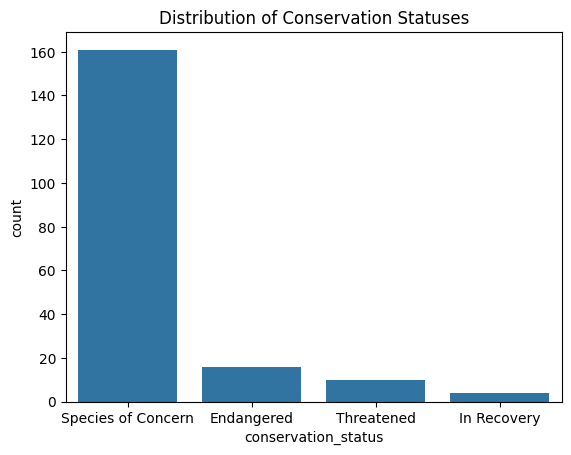

In [60]:
sns.countplot(data=species_df, x='conservation_status')
plt.title('Distribution of Conservation Statuses')
plt.show()


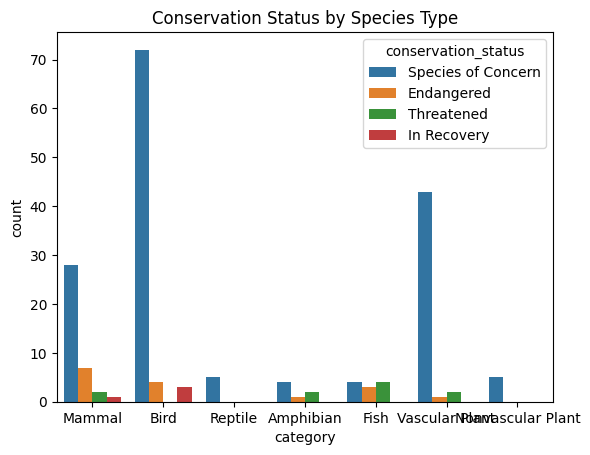

In [61]:
sns.countplot(data=species_df, x='category', hue='conservation_status')
plt.title('Conservation Status by Species Type')
plt.show()


In [62]:
print(species_df.columns)
print(observations_df.columns)


Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [63]:
# Filter endangered species
endangered_species = species_df[species_df['conservation_status'] == 'Endangered']

# Merge the DataFrames on 'scientific_name'
endangered_observations = pd.merge(endangered_species, observations_df, on='scientific_name')

# Check the merged DataFrame
print(endangered_observations.head())


  category scientific_name common_names conservation_status  \
0   Mammal     Canis lupus    Gray Wolf          Endangered   
1   Mammal     Canis lupus    Gray Wolf          Endangered   
2   Mammal     Canis lupus    Gray Wolf          Endangered   
3   Mammal     Canis lupus    Gray Wolf          Endangered   
4   Mammal     Canis lupus    Gray Wolf          Endangered   

                             park_name  observations  
0               Yosemite National Park            35  
1                  Bryce National Park            27  
2                  Bryce National Park            29  
3                  Bryce National Park            74  
4  Great Smoky Mountains National Park            15  


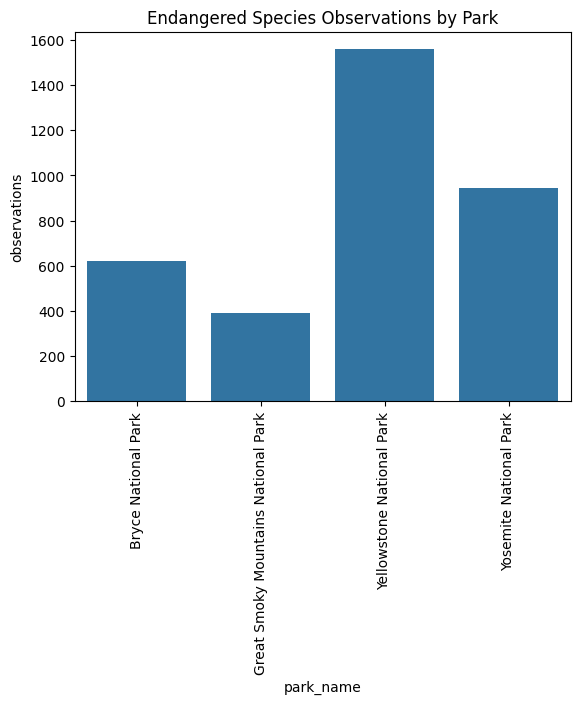

In [64]:
# Group by park_name and sum the observations
observations_by_park = endangered_observations.groupby('park_name')['observations'].sum().reset_index()

# Visualize the data
sns.barplot(data=observations_by_park, x='park_name', y='observations')
plt.xticks(rotation=90)
plt.title('Endangered Species Observations by Park')
plt.show()
